## Laboratorium 4 - algorytm Najbliższej Średniej (NM)


### Opis
Celem laboratorium jest implementacja klasyfikatora najbliższej średniej NM (*Nearest Mean*).


### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:
* Wczytaj dane.
* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Euklidesa**.
* Zaimplementuj funkcję, która zwraca macierz kowariancji (*uwaga: biblioteka `numpy` posiada gotową implementację `cov` z którą możesz porównać wynik*).

    \begin{equation*}
    C = \frac{1}{n - 1} (X - \bar X)(X - \bar X)^T
    \end{equation*}

    gdzie:
    * $X$ to macierz, 
    * $\bar X$ to wektor ze średnimi wartościami cech. 

* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Machalanobisa**.

    \begin{equation*}
    D_j = \sqrt{ (x - \mu_j)^T S_j^{-1}(x - \mu_j) },
    \end{equation*}

    gdzie:
    * $D_j$ to odległość klasyfikowanej próbki do $j$-tej klasy (grupy, klastra), 
    * $\mu_j$ to wektor ze średnimi wartościami cech w obrębie $j$-tej klasy, 
    * $S_j^{-1}$ to odwrócona macierz kowariancji $j$-tej klasy, 
    * a $x$ to klasyfikowana próbka.

* Opisz wyniki klasyfikatorów i porównaj je z klasyfikatorem *k*NN (porównaj w kontekście różnych metryk - obowiązkowo tablica pomyłek).

> Podpowiedź 1: Do obliczenia macierzy odwrotnej możesz użyć gotową implementację, np. funkcję `linalg.inv` z biblioteki `numpy`.

> Podpowiedź 2: Do wszelkich podstawowych operacji na macierzach (mnożenie, transpozycja, dodawanie, odejmowanie, itp.) możesz zastosować gotową implementację, np. bibliotekę `numpy`.

> UWAGA 1: W niniejszym zadaniu jest dowolność implementacji (nie trzeba trzymać się struktury z poprzedniego zadania), jednak algorytm NM należy zaimplementować samodzielnie bez korzystania z istniających rozwiązań (jak np. z biblioteki `scikit-learn`).

> UWAGA 2: Wszystkie wykonane elementy zadania powinny posiadać stosowne komentarze i opisy.


**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość).**

Przykład (na podstawie tablicy pomyłek):

**Źle** (nie wiadomo co jest poniżej zaprezentowane, kolumny ani wiersze nie są podpisane, nie wiadomo które z nich prezentują predykcje, a które właściwe etykiety):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```


<span style="text-decoration:underline">Referencje</span>

1. Mahalanobis, P C, _On test and measures of group divergence : theoretical formulae_, Journal and Proceedings of Asiatic Society of Bengal (New Series) Vol. 26, pp. 541-588. 1930. (URL: http://library.isical.ac.in:8080/xmlui/bitstream/handle/10263/1639/029.pdf)
2. McLachlan, Goeffrey J. _Mahalanobis distance_, Resonance, pp. 20-26. 1999. (URL: https://www.ias.ac.in/article/fulltext/reso/004/06/0020-0026)

NM

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, balanced_accuracy_score
import random
plt.rcParams["figure.figsize"] = (10, 10)

def normalize2(dataframe):
    return (dataframe-dataframe.min())/(dataframe.max()-dataframe.min())

with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
train = pd.DataFrame(train)
test = pd.DataFrame(test)

trainclass = train[[0]]
testclass = test[[0]]
trainfeatures = train.drop(columns = 0)
testfeatures = test.drop(columns = 0)

trainfeatures = normalize2(trainfeatures) #dane są normalizowane, zwiększa to znacząco efektywność modelu
testfeatures = normalize2(testfeatures)

train = pd.concat([trainclass, trainfeatures], axis=1)
test = pd.concat([testclass, testfeatures], axis=1)

train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,36.0,0.000000,0.325831,0.024266,0.703508,0.454962,0.495454,0.186267,0.385109,0.153731,0.305450,0.512751,0.332917,0.379755,0.097674,0.422129
1,5.0,0.230769,0.842476,0.095004,0.699710,0.587664,0.687900,0.356208,0.407041,0.171017,0.252791,0.379455,0.204207,0.172717,0.138704,0.459842
2,29.0,0.000000,0.748562,0.070003,0.454741,0.791479,0.820838,0.704091,0.091261,0.017223,0.033927,0.073304,0.034294,0.035405,0.020092,0.071054
3,35.0,0.153846,0.814872,0.103998,0.591342,0.791981,0.838695,0.600227,0.167316,0.035574,0.406714,0.529557,0.351359,0.300249,0.246043,0.599974
4,32.0,0.461538,0.793384,0.085556,0.523369,0.807735,0.838695,0.735215,0.056424,0.012777,0.137020,0.259345,0.116085,0.103741,0.075136,0.258137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,31.0,0.153846,0.888591,0.631373,0.940717,0.566912,0.813351,0.036798,0.977847,0.999337,0.075008,0.072099,0.046594,0.038122,0.044660,0.100357
2240,29.0,0.384615,0.649516,0.083071,0.414323,0.693427,0.747146,0.709980,0.159751,0.030691,0.072038,0.120475,0.020127,0.041457,0.010220,0.117377
2241,12.0,0.538462,0.876392,0.103914,0.571506,0.758792,0.758740,0.441793,0.145231,0.046227,0.477821,0.554340,0.434899,0.401871,0.169536,0.805418
2242,28.0,0.769231,0.779316,0.094852,0.438814,0.691993,0.995541,0.783562,0.030697,0.015465,0.578124,0.701170,0.540490,0.429988,0.371596,0.805269


In [71]:
list_of_classes = [1.0, 33.0]
list_of_features = [0, 9, 14]

treningowy = train[(train[0] == list_of_classes[0]) | (train[0] == list_of_classes[1])]
testowy = test[(test[0] == list_of_classes[0]) | (test[0] == list_of_classes[1])]

treningowy3 = train[train[0] == list_of_classes[0]]
treningowy5 = train[train[0] == list_of_classes[1]]

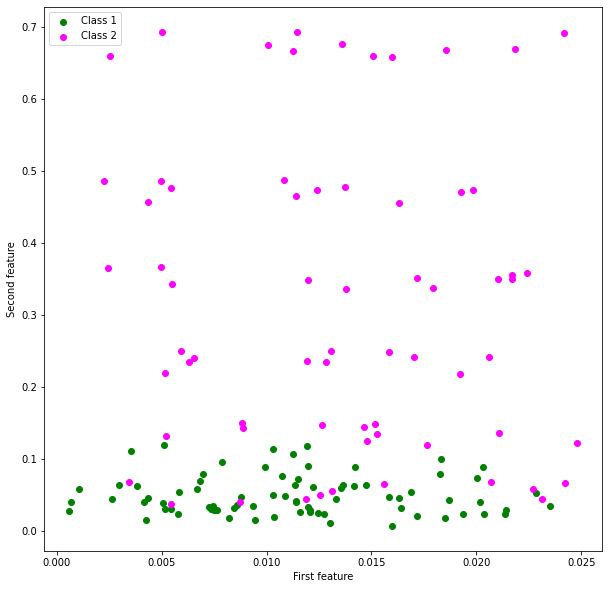

In [72]:
cechytestowe3 = treningowy3.loc[:, list_of_features]
cechytestowe5 = treningowy5.loc[:, list_of_features]
plt.figure()
plt.scatter(cechytestowe3[list_of_features[1]], cechytestowe3[list_of_features[2]], color = 'green', label='Class 1')
plt.scatter(cechytestowe5[list_of_features[1]], cechytestowe5[list_of_features[2]], color ='magenta', label='Class 2')
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.legend()
plt.show()

<h1><center><font size="6">Klasyfikator NM z odległością Euklidesa</font></center></h1>

In [73]:
def edist(p1, p2, features):
    distance_elements = []
    for i in range(0, len(features)):
        distance_elements.append((p1[features[i]]-p2[features[i]])**2)
    distance = sum(distance_elements)**(1/2)
    return distance

In [74]:
def model(train, test, list_of_classes, list_of_features):

    for i in range(len(list_of_classes)):
        if i == 0:
            treningowy = train[(train[0] == list_of_classes[0])]
            testowy = test[(test[0] == list_of_classes[0])]
        else:
            treningowy = pd.concat([treningowy, train[(train[0] == list_of_classes[i])]], axis=0)
            testowy = pd.concat([testowy, test[(test[0] == list_of_classes[i])]], axis=0)

    testowy = testowy.loc[:, list_of_features]
    testowy['Observed class'] = None
    testowy.rename(columns={0:'Class'}, inplace=True)
    treningowy = treningowy.loc[:, list_of_features]

    features = []
    for i in range(1, len(list_of_features)):
        features.append(i)

    mean_features = []
    for uniq_class in range(len(list_of_classes)):
        temp_list = []
        for feature in list_of_features:
            temp_list.append(treningowy[(treningowy[0] == list_of_classes[uniq_class])].mean()[feature])
        mean_features.append(temp_list)
    mean_features = np.asarray(mean_features)

    for i in range(len(testowy.iloc[:])):
        distancelist = []
        for j in range(len(mean_features)):
            distance = edist(testowy.values[i], mean_features[j], features)
            distancelist.append((distance, mean_features[j,0]))
        distancelist = sorted(distancelist, key=lambda tup: tup[0])
        testowy.iloc[i, -1] = distancelist[0][1]

    true_class = list(testowy.loc[:, 'Class'])
    model_class = list(testowy.loc[:, 'Observed class'])
    return true_class, model_class

In [93]:
list_of_classes = [4.0, 6.0]
list_of_features = [0, 5, 7]
true_class, model_class = model(train, test, list_of_classes, list_of_features)
balanced_accuracy_score(true_class, model_class)

1.0

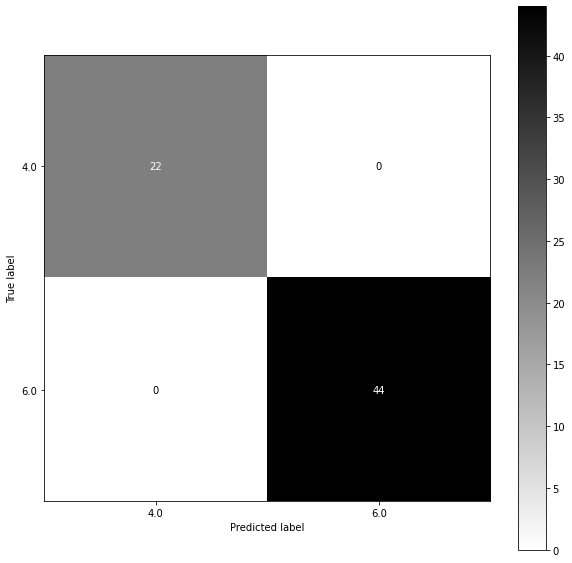

In [94]:
confusion = confusion_matrix(true_class, model_class)
display = ConfusionMatrixDisplay(confusion, display_labels=list_of_classes)
display.plot(cmap='binary')
plt.show()

<h1><center><font size="6">Macierz kowariancji</font></center></h1>

In [77]:
def covar_matrix(train, list_of_features, number_class): #obliczanie macierzy kowariancji dla danej klasy

    treningowy = train[(train[0] == number_class)]
    treningowy = treningowy.loc[:, list_of_features]

    features = []
    for i in range(1, len(list_of_features)):
        features.append(i)

    mean_features = []
    for feature in list_of_features:
        mean_features.append(treningowy[(treningowy[0] == number_class)].mean()[feature])
    mean_features = np.asarray(mean_features)

    matrix_help = np.empty(shape=(1,len(list_of_features)-1))
    treningowy = np.asarray(treningowy)

    for sample in range(len(treningowy)):
        if treningowy[sample][0] == number_class:
            row = []
            for element in range(1, len(list_of_features)):
                row.append(treningowy[sample][element]-mean_features[element])
            matrix_help = np.vstack([matrix_help, row])
    matrix_help = np.delete(matrix_help, obj=0, axis=0)

    return 1/(len(matrix_help)-1) * matrix_help.T @ matrix_help

<h1><center><font size="6">Klasyfikator NM z odległością Mahalanobisa</font></center></h1>

In [78]:
def mean_class(train, list_of_features, number_class): #obliczanie wartości średniej wektora klasy

    treningowy = train[(train[0] == number_class)]
    treningowy = treningowy.loc[:, list_of_features]

    features = []
    for i in range(1, len(list_of_features)):
        features.append(i)

    mean_features = []
    for feature in list_of_features:
        mean_features.append(treningowy[(treningowy[0] == number_class)].mean()[feature])
    mean_features = np.asarray(mean_features)
    return mean_features

def mahal(covar_matrix, mean_class, xtest): # obliczanie odległości mahalanobisa

    difference = []
    for element in range(1, len(xtest)):
        difference.append(xtest[element] - mean_class[element])
    difference = np.asarray(difference)
    difference = difference.reshape(1,len(xtest)-1)

    return (np.matmul(np.matmul(difference, np.linalg.pinv(covar_matrix)), difference.T))**(1/2)

In [79]:
def mahalanobis_model(train, test, list_of_classes, list_of_features):

    for i in range(len(list_of_classes)):
        if i == 0:
            treningowy = train[(train[0] == list_of_classes[0])]
            testowy = test[(test[0] == list_of_classes[0])]
        else:
            treningowy = pd.concat([treningowy, train[(train[0] == list_of_classes[i])]], axis=0)
            testowy = pd.concat([testowy, test[(test[0] == list_of_classes[i])]], axis=0)

    testowy = testowy.loc[:, list_of_features]
    testowy.rename(columns={0:'Class'}, inplace=True)
    testowy_classified = testowy.copy(deep=False)
    testowy_classified['Observed class'] = None

    for i in range(len(testowy.iloc[:])):
        distancelist = []

        for j in range(len(list_of_classes)):
            distance = mahal(covar_matrix(train, list_of_features, list_of_classes[j]), mean_class(train, list_of_features, list_of_classes[j]), testowy.values[i])
            distancelist.append((distance[0,0], list_of_classes[j]))

        distancelist = sorted(distancelist, key=lambda tup: tup[0])
        testowy_classified.iloc[i, -1] = distancelist[0][1]

    true_class = list(testowy_classified.loc[:, 'Class'])
    model_class = list(testowy_classified.loc[:, 'Observed class'])
    return true_class, model_class

In [95]:
list_of_classes = [4, 6, 9, 10]
list_of_features = [0, 5, 7, 10]
true_class, model_class = mahalanobis_model(train, test, list_of_classes, list_of_features)

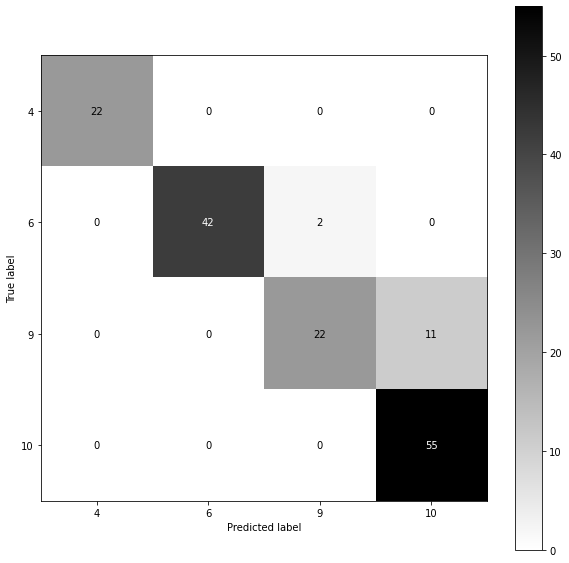

In [96]:
confusion = confusion_matrix(true_class, model_class)
display = ConfusionMatrixDisplay(confusion, display_labels=list_of_classes)
display.plot(cmap='binary')
plt.show()

In [82]:
print(round(balanced_accuracy_score(true_class, model_class), 4))

0.9053


<h1><center><font size="6">Porównanie modeli z różnym rozmiarem grupy klas i cech</font></center></h1>

In [83]:
set_2_2 = []
f1_2_2 = []
list_of_classes = []
list_of_features = [0]
for i in range(1, 3):
    list_of_classes.append(float(i))
for i in range(1, 3):
    list_of_features.append(int(i))
true_class, model_class = mahalanobis_model(train, test, list_of_classes, list_of_features)
balacc = balanced_accuracy_score(true_class, model_class)
prec = f1_score(true_class, model_class, average='micro')
f1_2_2.append(prec)
set_2_2.append(balacc)

In [84]:
set_2_5 = []
f1_2_5 = []
list_of_classes = []
list_of_features = [0]
for i in range(1, 3):
    list_of_classes.append(float(i))
for i in range(1, 6):
    list_of_features.append(int(i))
true_class, model_class = mahalanobis_model(train, test, list_of_classes, list_of_features)
balacc = balanced_accuracy_score(true_class, model_class)
prec = f1_score(true_class, model_class, average='micro')
f1_2_5.append(prec)
set_2_5.append(balacc)

In [85]:
set_2_10 = []
f1_2_10 = []
list_of_classes = []
list_of_features = [0]
for i in range(1, 3):
    list_of_classes.append(float(i))
for i in range(1, 11):
    list_of_features.append(int(i))
true_class, model_class = mahalanobis_model(train, test, list_of_classes, list_of_features)
balacc = balanced_accuracy_score(true_class, model_class)
prec = f1_score(true_class, model_class, average='micro')
f1_2_10.append(prec)
set_2_10.append(balacc)

In [86]:
set_4_2 = []
f1_4_2 = []
list_of_classes = []
list_of_features = [0]
for i in range(1, 5):
    list_of_classes.append(float(i))
for i in range(1, 3):
    list_of_features.append(int(i))
true_class, model_class = mahalanobis_model(train, test, list_of_classes, list_of_features)
balacc = balanced_accuracy_score(true_class, model_class)
prec = f1_score(true_class, model_class, average='micro')
f1_4_2.append(prec)
set_4_2.append(balacc)

In [87]:
set_4_5 = []
f1_4_5 = []
list_of_classes = []
list_of_features = [0]
for i in range(1, 5):
    list_of_classes.append(float(i))
for i in range(1, 6):
    list_of_features.append(int(i))
true_class, model_class = mahalanobis_model(train, test, list_of_classes, list_of_features)
balacc = balanced_accuracy_score(true_class, model_class)
prec = f1_score(true_class, model_class, average='micro')
f1_4_5.append(prec)
set_4_5.append(balacc)

In [88]:
set_4_10 = []
f1_4_10 = []
list_of_classes = []
list_of_features = [0]
for i in range(1, 5):
    list_of_classes.append(float(i))
for i in range(1, 11):
    list_of_features.append(int(i))
true_class, model_class = mahalanobis_model(train, test, list_of_classes, list_of_features)
balacc = balanced_accuracy_score(true_class, model_class)
prec = f1_score(true_class, model_class, average='micro')
f1_4_10.append(prec)
set_4_10.append(balacc)

In [89]:
set_8_2 = []
f1_8_2 = []
list_of_classes = []
list_of_features = [0]
for i in range(1, 9):
    list_of_classes.append(float(i))
for i in range(1, 3):
    list_of_features.append(int(i))
true_class, model_class = mahalanobis_model(train, test, list_of_classes, list_of_features)
balacc = balanced_accuracy_score(true_class, model_class)
prec = f1_score(true_class, model_class, average='micro')
f1_8_2.append(prec)
set_8_2.append(balacc)

In [90]:
set_8_5 = []
f1_8_5 = []
list_of_classes = []
list_of_features = [0]
for i in range(1, 9):
    list_of_classes.append(float(i))
for i in range(1, 6):
    list_of_features.append(int(i))
true_class, model_class = mahalanobis_model(train, test, list_of_classes, list_of_features)
balacc = balanced_accuracy_score(true_class, model_class)
prec = f1_score(true_class, model_class, average='micro')
f1_8_5.append(prec)
set_8_5.append(balacc)

In [91]:
set_8_10 = []
f1_8_10 = []
list_of_classes = []
list_of_features = [0]
for i in range(1, 9):
    list_of_classes.append(float(i))
for i in range(1, 11):
    list_of_features.append(int(i))
true_class, model_class = mahalanobis_model(train, test, list_of_classes, list_of_features)
balacc = balanced_accuracy_score(true_class, model_class)
prec = f1_score(true_class, model_class, average='micro')
f1_8_10.append(prec)
set_8_10.append(balacc)

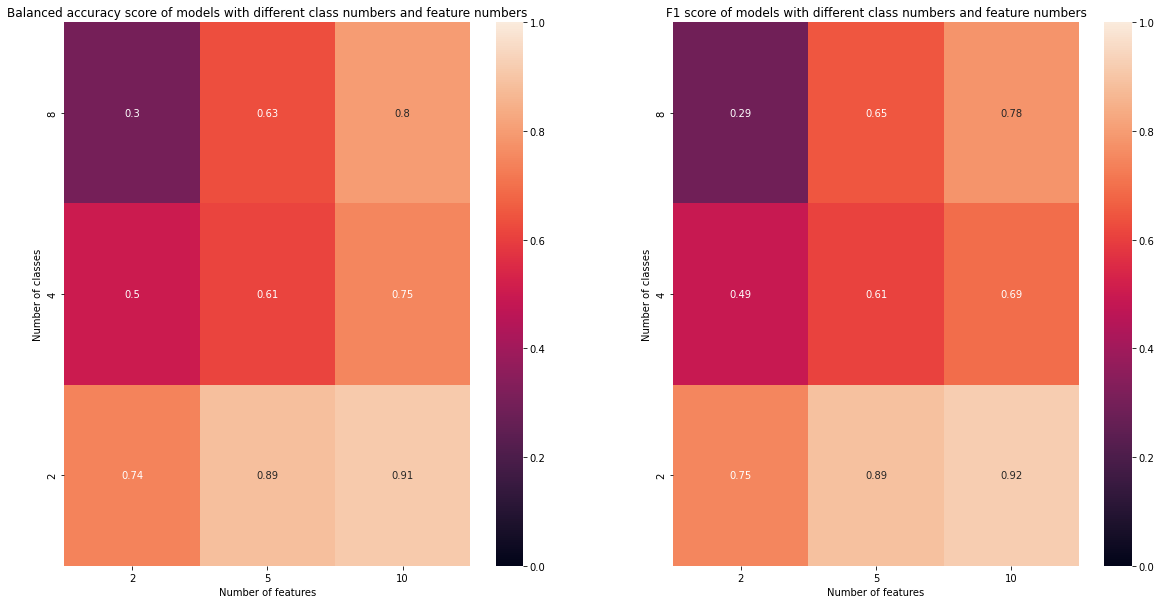

In [92]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

data_set = pd.DataFrame([[set_8_2[0], set_8_5[0], set_8_10[0]],
                     [set_4_2[0], set_4_5[0], set_4_10[0]],
                      [set_2_2[0], set_2_5[0], set_2_10[0]]])

data_f1 = pd.DataFrame([[f1_8_2[0], f1_8_5[0], f1_8_10[0]],
                     [f1_4_2[0], f1_4_5[0], f1_4_10[0]],
                      [f1_2_2[0], f1_2_5[0], f1_2_10[0]]])

sns.heatmap(data_set, xticklabels=[2,5,10], yticklabels=[8,4,2], annot=True, vmin=0, vmax=1, ax=ax1)
ax1.set_xlabel('Number of features')
ax1.set_ylabel('Number of classes')
ax1.set_title('Balanced accuracy score of models with different class numbers and feature numbers')

sns.heatmap(data_f1, xticklabels=[2,5,10], yticklabels=[8,4,2], annot=True, vmin=0, vmax=1, ax=ax2)
ax2.set_xlabel('Number of features')
ax2.set_ylabel('Number of classes')
ax2.set_title('F1 score of models with different class numbers and feature numbers')

plt.show()

Przedstawione wyniki zawierają te same dane wejściowe wkładane do modeli co w moim wykonaniu ćwiczenia 3 (kNN) - jest to podstawą do porównania tych wyników. Wyniki BAS i F1S modelu NM z zaimplementowaną odległością Mahalanobisa są zauważalnie wyższe niż analogiczne wyniki dla modelu kNN (gdzie k jest dowolną wartością, która daje maksymalny BAS i F1S w ćwiczeniu poprzednim). Dla porównania: Zestaw danych o liczbie klas = 8 i cech = 10 dał w modelu NM/M BAS równy 0.8, podczas gdy w ćwiczeniu poprzednim było to ok. 0.76. Pozostałe wyniki wykazują podobną tendencję - lepsze są modele NM/M. Interesującym faktem jest również to, że modele NM/M iterowane są dużo szybciej niż kNN (jest to coś co zauważyłem podczas tworzenia kodu, nie przeprowadzałem pomiarów szybkości). Dodatkowo w modelu NM/M nie musimy szukać optymalnej wartości liczby sąsiadów w porównaniu z modelem kNN, co również znacznie przyspiesza iterację kodu.